# Challenge Set 5 - Linear Regression and Train/Test Split challenges

In [18]:
import pandas as pd
import html5lib
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import dateutil

%matplotlib inline

In [19]:
df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challenges_data/2013_movies.csv")

In [20]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


#### Challenge 1

In [21]:
df1 = pd.DataFrame(df['DomesticTotalGross'])

In [22]:
df1['Constant'] = 1

In [23]:
df1.head()

,DomesticTotalGross,Constant
0,424668047,1
1,409013994,1
2,400738009,1
3,368061265,1
4,291045518,1


In [24]:
X = df1['Constant'].reshape(-1,1)

In [25]:
# import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = train_test_split(X, df1['DomesticTotalGross'], test_size=0.3,random_state=42)

In [26]:
y = df1['DomesticTotalGross']

In [27]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
test_set_pred = lr_model.predict(X)

(array([  3.,   1.,   0.,   3.,   4.,   3.,   3.,  15.,  21.,  47.]),
 array([ -3.24071172e+08,  -2.84161192e+08,  -2.44251213e+08,
         -2.04341233e+08,  -1.64431253e+08,  -1.24521274e+08,
         -8.46112942e+07,  -4.47013146e+07,  -4.79133498e+06,
          3.51186446e+07,   7.50286242e+07]),
 <a list of 10 Patch objects>)

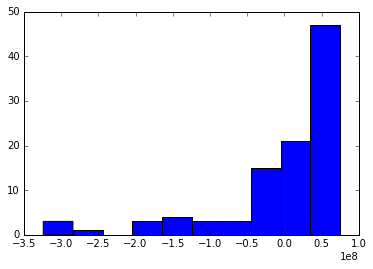

In [29]:
plt.hist(test_set_pred-y)
# plt.plot()  #np.linspace(0,100,1),np.linspace(0,100,1))

#### Challenge 2

In [30]:
df2 = df[['DomesticTotalGross','Budget']]

In [31]:
df2.head()

,DomesticTotalGross,Budget
0,424668047,130000000.0
1,409013994,200000000.0
2,400738009,150000000.0
3,368061265,76000000.0
4,291045518,225000000.0


In [32]:
df2['Constant'] = 1

C:\Users\aj282_000\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df2 = df2.dropna()

In [34]:
df2.head()

,DomesticTotalGross,Budget,Constant
0,424668047,130000000.0,1
1,409013994,200000000.0,1
2,400738009,150000000.0,1
3,368061265,76000000.0,1
4,291045518,225000000.0,1


In [35]:
X = df2[['Budget', 'Constant']]

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, df2['DomesticTotalGross'], test_size=0.3,random_state=42)

In [37]:
y = df2['DomesticTotalGross']

In [38]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
test_set_pred = lr_model.predict(X)

(array([  3.,   1.,   0.,   1.,   6.,  11.,  28.,  28.,   7.,   4.]),
 array([ -2.78269586e+08,  -2.36108160e+08,  -1.93946734e+08,
         -1.51785309e+08,  -1.09623883e+08,  -6.74624575e+07,
         -2.53010319e+07,   1.68603937e+07,   5.90218194e+07,
          1.01183245e+08,   1.43344671e+08]),
 <a list of 10 Patch objects>)

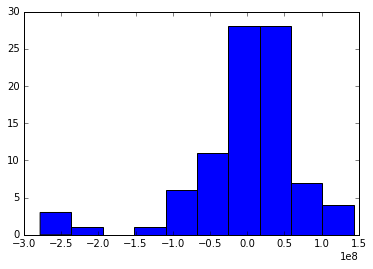

In [40]:
plt.hist(test_set_pred-y)

#### Challenge 3

In [41]:
rating_dummies = pd.get_dummies(df['Rating'])

In [42]:
dfx = df[['DomesticTotalGross','Budget']]

In [43]:


df3 = pd.concat([dfx,rating_dummies], axis=1)

In [44]:
df3 = df3.dropna()

In [45]:
df3['Constant'] = 1
df3.head()

,DomesticTotalGross,Budget,G,PG,PG-13,R,Constant
0,424668047,130000000.0,0.0,0.0,1.0,0.0,1
1,409013994,200000000.0,0.0,0.0,1.0,0.0,1
2,400738009,150000000.0,0.0,1.0,0.0,0.0,1
3,368061265,76000000.0,0.0,1.0,0.0,0.0,1
4,291045518,225000000.0,0.0,0.0,1.0,0.0,1


In [46]:
X = df3.iloc[:,1:]

In [47]:
y = df3['DomesticTotalGross']

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [49]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
test_set_pred = lr_model.predict(X)

(array([  2.,   2.,   0.,   1.,   6.,  10.,  26.,  28.,  10.,   4.]),
 array([ -2.82607880e+08,  -2.40460103e+08,  -1.98312327e+08,
         -1.56164550e+08,  -1.14016773e+08,  -7.18689958e+07,
         -2.97212189e+07,   1.24265580e+07,   5.45743349e+07,
          9.67221118e+07,   1.38869889e+08]),
 <a list of 10 Patch objects>)

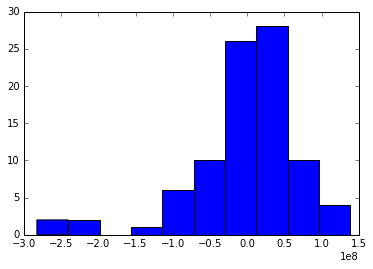

In [51]:
plt.hist(test_set_pred-y)

#### Challenge 4

In [52]:
dfx = df[['DomesticTotalGross','Budget', 'Runtime']]
df4 = pd.concat([dfx,rating_dummies], axis=1)

In [53]:
df4 = df4.dropna()
df4['Constant'] = 1

In [54]:
X = df4.iloc[:,1:]

In [55]:
y = df4['DomesticTotalGross']

In [56]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
test_set_pred = lr_model.predict(X)

(array([  2.,   2.,   1.,   0.,   5.,  13.,  26.,  26.,  11.,   3.]),
 array([ -2.67927997e+08,  -2.27287179e+08,  -1.86646361e+08,
         -1.46005543e+08,  -1.05364725e+08,  -6.47239067e+07,
         -2.40830886e+07,   1.65577296e+07,   5.71985477e+07,
          9.78393658e+07,   1.38480184e+08]),
 <a list of 10 Patch objects>)

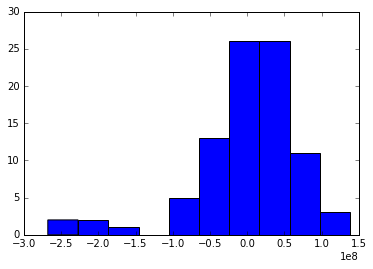

In [58]:
plt.hist(test_set_pred-y)

#### Challenge 5

In [59]:
dfx = df[['DomesticTotalGross','Budget', 'Runtime']]

In [60]:
df4 = pd.concat([dfx,rating_dummies], axis=1)

In [61]:
df4 = df4.dropna()
df4['Constant'] = 1

In [62]:
X = df4.iloc[:,1:]

In [63]:
y = df4['DomesticTotalGross']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
test_set_pred = lr_model.predict(X_test)

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  4.,  6.,  6.,  4.]),
 array([ -2.89689242e+08,  -2.53276780e+08,  -2.16864318e+08,
         -1.80451855e+08,  -1.44039393e+08,  -1.07626931e+08,
         -7.12144691e+07,  -3.48020070e+07,   1.61045506e+06,
          3.80229172e+07,   7.44353793e+07]),
 <a list of 10 Patch objects>)

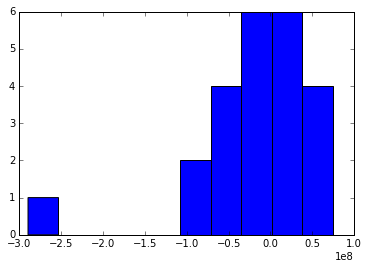

In [67]:
plt.hist(test_set_pred-y_test)

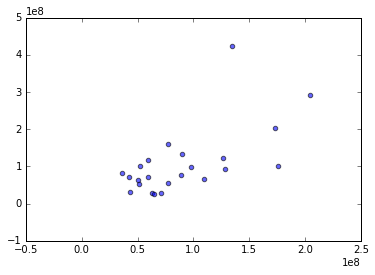

In [68]:
plt.scatter(test_set_pred,y_test,alpha=.6)
plt.plot(np.linspace(0,100,1),np.linspace(0,100,1))